In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
from matplotlib.backends.backend_pdf import PdfPages

End-end Distance

In [11]:
traj=md.load_xtc('../Setup/HPC/2jof_gromacs/gromacs/2jof_center.xtc',top='../Setup/HPC/2jof_gromacs/gromacs/2jof_center.gro')

In [12]:
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)
#compute the radius of gyration
radius=md.compute_rg(traj)

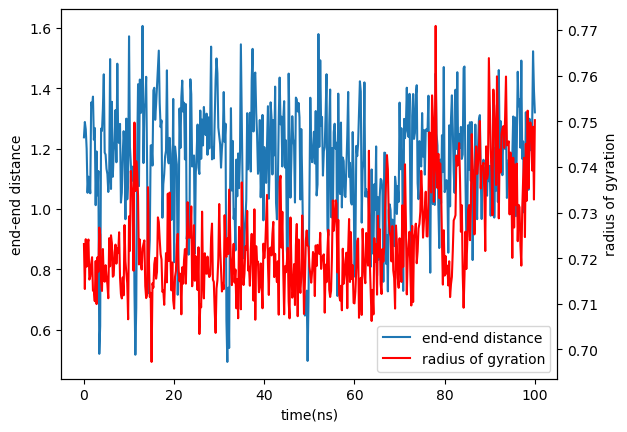

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)

line_distance=ax.plot(traj.time[::2]/1000,dist[::2],label='end-end distance')

ax_left=ax.twinx()
line_radius=ax_left.plot(traj.time[::2]/1000,radius[::2],'-r',label='radius of gyration')

ax.legend(line_distance+line_radius,['end-end distance','radius of gyration'],loc=0)
ax.set_xlabel('time(ns)')
ax.set_ylabel('end-end distance')
ax_left.set_ylabel('radius of gyration')

pdf_file=PdfPages('../Figures/Week4_2jof_figures.pdf')
pdf_file.savefig()

plt.show()

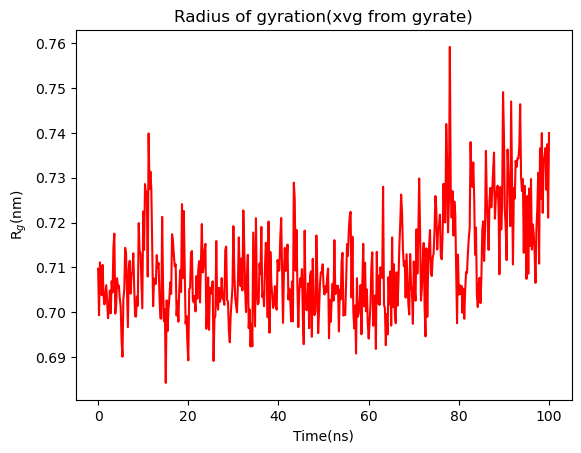

In [15]:
x,y,z,n,m=np.loadtxt('../Figures/2jof_gyrate.xvg',skiprows=27,unpack=True)
plt.plot(x[::2]/1000,y[::2],color='red')
plt.title('Radius of gyration(xvg from gyrate)')
plt.xlabel('Time(ns)')
plt.ylabel('R$_{g}$(nm)')
pdf_file.savefig()
pdf_file.close()